<a href="https://www.kaggle.com/code/ebrukemikkiran/ifood-campaign-analysis?scriptVersionId=105218661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**IFOOD DATA SET**

This notebook will conduct an EDA of the data The focus of this EDA will be on how campaign varies by atributes Introduction. This notebook will accomplish the following task:

***Table of Content***



**1. Fetching Data**
 
 1.1 Import packages
 
 1.2 Import data
 
**2. Data Cleaning**
 
 2.1 Finding inconsistencies in the dataset if it has got

**3. Summary**
 
 3.1 Summary statistics for campaign's related numeric attribute

 3.2 Summary and count for campaign's related categorical attribute 

**4. EDA**

 Univariate analysis

 Bivariate analysis
 
 Multivariate analysis

**5. Statistical Modelling**

  Logistic Reression, Chi2, Random Forest, XBOOSTG



### 1. Fetching Data

#####1.1 Import Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/ifood_df.csv
/kaggle/input/marketing-data/dictionary.png


In [2]:
data1 = pd.read_csv("../input/marketing-data/ifood_df.csv")

In [3]:
type(data1.values)

numpy.ndarray

In [4]:
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import scatter_matrix

import numpy as np
from numpy import std
from numpy import median
from numpy import nan as NA

import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib import cm
import missingno as msno 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import scipy as scipy
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_ind, ttest_rel

import math
import warnings
warnings.filterwarnings('ignore')

import altair as alt
import seaborn as sns
import random
import statsmodels.api as sm





/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [5]:
%matplotlib inline
plt.close("all")

In [6]:
data1.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [7]:
data1.shape

(2205, 39)

In [8]:
data1.index.names

FrozenList([None])

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [10]:
data1.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [11]:
np.sign(data1)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,1.0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,1,1,0
1,1.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,1,1,0
2,1.0,0,0,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,1,1,0
3,1.0,1,0,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,1,1,0
4,1.0,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1.0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,1,1,0
2201,1.0,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,1,1,1,1
2202,1.0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,1,1,1
2203,1.0,0,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,0,1,1,0


In [12]:
dataT=data1.T

In [13]:
dataT.iloc[26:31, 0:2205].duplicated().sum()

0

In [14]:
dataT.iloc[31:36, 0:2205].duplicated().sum()

0

In [15]:
plot_all1 =data1[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'  ]]

plot_all2=data1[[ 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall']]

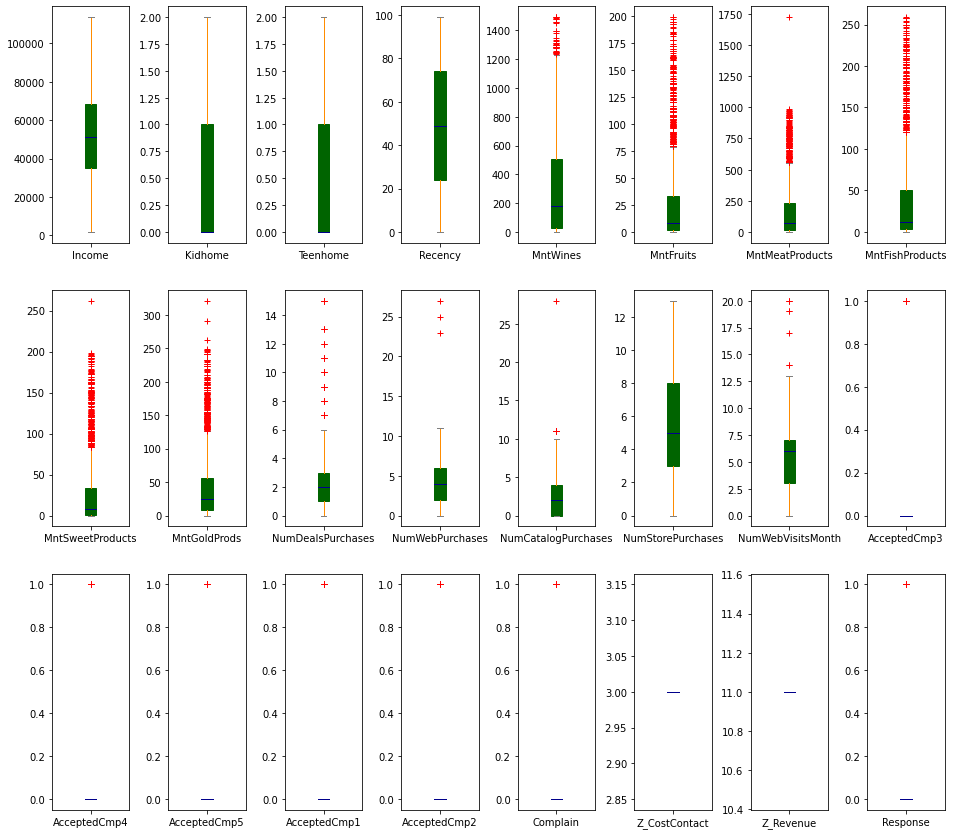

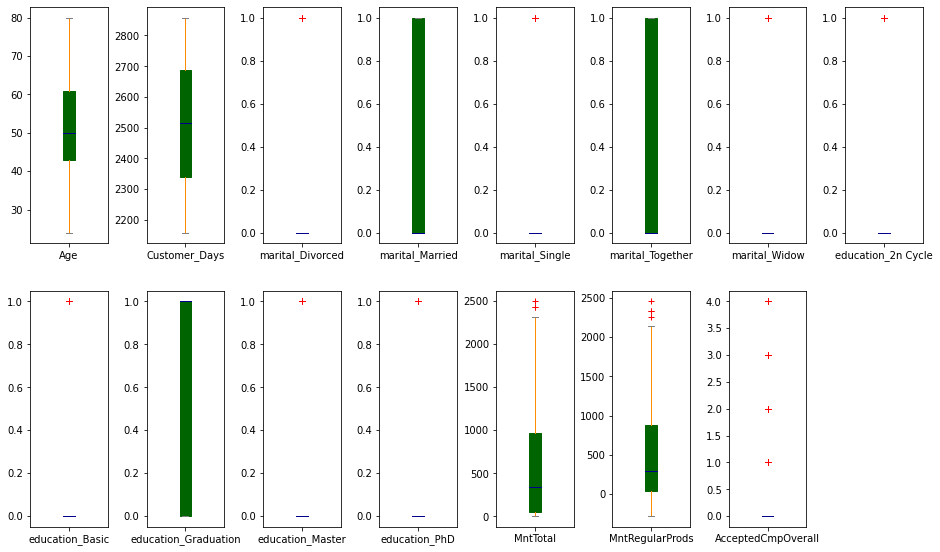

In [16]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
plot_all1.plot(subplots=True, layout=(4,8), kind='box', color=color,  sym="r+", figsize=(16,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);
plot_all2.plot(subplots=True, layout=(4,8), kind='box', color=color, sym="r+", figsize=(16,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);



The below histogram shows that :
"Age" attribute is fine.
"Income" attribute is not symmetric, but this is totally fine. I will check lowerbound and higherbound values for income col and if that needs I wil be implfy normalization of this attribute


24

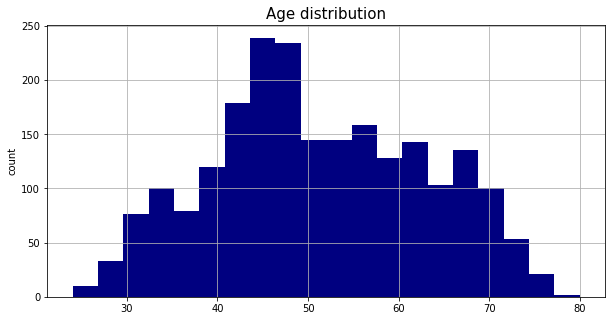

In [17]:
data1.Age.hist(bins=20, color="navy", figsize=(10,5))
plt.title('Age distribution', size=15)
plt.ylabel('count');
data1.Age.min()

1730.0

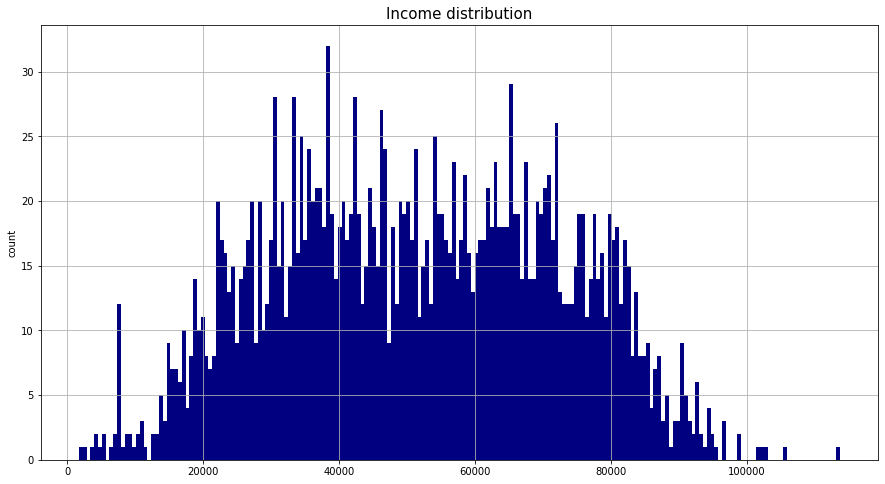

In [18]:
data1.Income.hist(bins=200, color="navy", figsize=(15,8))
plt.title('Income distribution', size=15)
plt.ylabel('count');
data1.Income.min()

In [19]:
Q1 = data1.Income.quantile(0.25)
Q1 = data1.Income.quantile(0.25)
Q2 = data1.Income.quantile(0.50)
Q3 = data1.Income.quantile(0.75)
IQR = Q3 - Q1

In [20]:
Q1

35196.0

In [21]:
Q3

68281.0

In [22]:
lowerbound=1.5*IQR - Q1
higherbound=1.5*IQR +Q3

In [23]:
data1.loc[data1["Income"]<lowerbound, "Income"] =lowerbound
data1.loc[data1["Income"]>higherbound, "Income"] =higherbound

14431.5

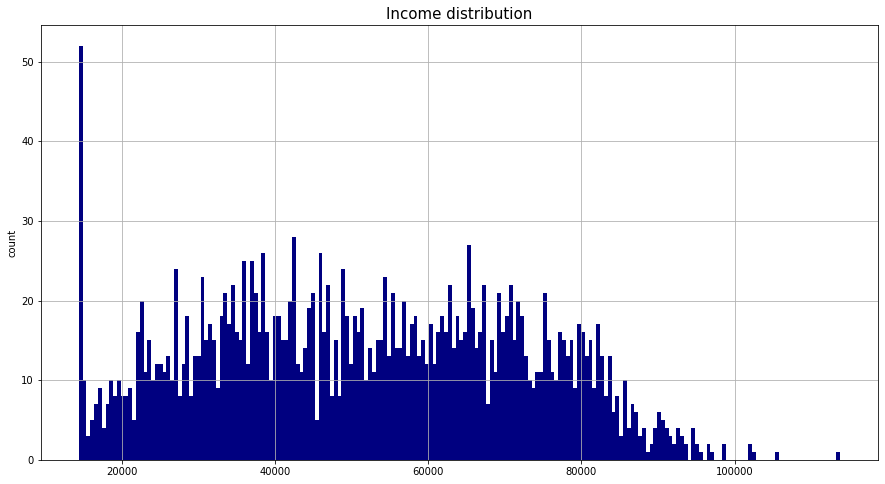

In [24]:
data1.Income.hist(bins=200, color="navy", figsize=(15,8))
plt.title('Income distribution', size=15)
plt.ylabel('count');
data1.Income.min()

In [25]:
data1.rename(columns={'NumDealsPurchases':'deals_purchases', 'NumWebPurchases':'web_purchases',
                      'NumCatalogPurchases':'catalog_purcaheses', 'NumStorePurchases':'store_purchases', 
                      'NumWebVisitsMonth':'web_visit_month','AcceptedCmp3':'accepted_cmp_3', 'AcceptedCmp4':'accepted_cmp_4','Recency':'recency','Customer_Days':'customer_days',
                      'AcceptedCmp5':'accepted_cmp_5', 'AcceptedCmp1':'accepted_cmp_1', 'AcceptedCmp2':'accepted_cmp_2',
                      'Complain':'complain', 'Z_CostContact':'z_cost_contact', 'Z_Revenue':'z_revenue', 'marital_Divorced':'divorced', 'marital_Married':'married',
                      'marital_Single':'single', 'marital_Together':'together', 'marital_Widow':'widow',
                      'Response':'cust_response','MntTotal':'total_purchase', 'MntRegularProds':'regular_products',
                      'AcceptedCmpOverall':'accepted_cmp_overall','Income':'income','MntWines': 'wines',
                      'MntFruits':'fruits','MntMeatProducts':'meat','MntFishProducts':'fish','MntSweetProducts':'sweet',
                      'MntGoldProds':'gold','education_2n Cycle':'e_second_cycle', 'education_Basic':'e_basic', 
                      'education_Graduation':'e_graduation', 'education_Master':'e_master', 'education_PhD':'e_phd','Age':'age','Kidhome':'kidhome','Teenhome':'teenhome'}, inplace=True)


I make some new cols for some combined analysis

In [26]:
data1['child_st'] = np.where(data1.kidhome+data1.teenhome>0, 'with_child', 'none_child')
data1['child_total']=data1['kidhome']+data1['teenhome']
data1['total_cmp']=data1['accepted_cmp_1']+data1['accepted_cmp_2']+data1['accepted_cmp_3']+data1['accepted_cmp_4']+data1['accepted_cmp_5']

In [27]:
data1['e_second_cyclecopy']=np.where(data1.e_second_cycle>0, 'e_second_cycle', 0)
data1['e_basiccopy']=np.where(data1.e_basic>0, 'e_basic', 0)
data1['e_graduationcopy']=np.where(data1.e_graduation>0, 'e_graduation', 0)
data1['e_mastercopy']=np.where(data1.e_master>0, 'e_master', 0)
data1['e_phdcopy']=np.where(data1.e_phd>0, 'e_phd', 0)



data1['divorcedcopy']=np.where(data1.divorced>0, 'divorced', 0)
data1['marriedcopy']=np.where(data1.married>0, 'married', 0)
data1['singlecopy']=np.where(data1.single>0, 'single', 0)
data1['togethercopy']=np.where(data1.together>0, 'together', 0)
data1['widowcopy']=np.where(data1.widow>0, 'widow', 0)





In [28]:
marital1=data1
marital1=marital1[(marital1.marriedcopy=="married")]
marital1.drop(columns=['divorcedcopy','singlecopy', 'togethercopy', 'widowcopy' ], inplace=True)
marital1.rename(columns={"marriedcopy":"marital_st"} , inplace=True)

marital2=data1
marital2=marital2[(marital2.divorcedcopy=="divorced")]
marital2.drop(columns=['marriedcopy','singlecopy', 'togethercopy', 'widowcopy' ], inplace=True)
marital2.rename(columns={"divorcedcopy":"marital_st"} , inplace=True)

marital3=data1
marital3=marital3[(marital3.singlecopy=="single")]
marital3.drop(columns=['marriedcopy','divorcedcopy', 'togethercopy', 'widowcopy' ], inplace=True)
marital3.rename(columns={"singlecopy":"marital_st"} , inplace=True)

marital4=data1
marital4=marital4[(marital4.widowcopy=="widow")]
marital4.drop(columns=['marriedcopy','divorcedcopy', 'togethercopy', 'singlecopy' ], inplace=True)
marital4.rename(columns={"widowcopy":"marital_st"} , inplace=True)

marital5=data1
marital5=marital5[(marital5.togethercopy=="together")]
marital5.drop(columns=['marriedcopy','divorcedcopy', 'widowcopy', 'singlecopy' ], inplace=True)
marital5.rename(columns={"togethercopy":"marital_st"} , inplace=True)


In [29]:
frames=[marital1, marital2, marital3, marital4, marital5]

In [30]:
pd.concat(frames)

,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweet,gold,...,accepted_cmp_overall,child_st,child_total,total_cmp,e_second_cyclecopy,e_basiccopy,e_graduationcopy,e_mastercopy,e_phdcopy,marital_st
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,with_child,1,0,0,0,0,0,e_phd,married
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,with_child,1,0,0,0,0,0,e_phd,married
10,14431.5,0,0,59,6,16,11,11,1,16,...,0,none_child,0,0,0,e_basic,0,0,0,married
13,17323.0,0,0,38,3,14,17,6,1,5,...,0,none_child,0,0,0,0,e_graduation,0,0,married
15,41850.0,1,1,51,53,5,19,2,13,4,...,0,with_child,2,0,0,0,e_graduation,0,0,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,40101.0,1,0,73,171,3,129,26,24,62,...,0,with_child,1,0,0,0,0,e_master,0,together
2189,14431.5,1,0,7,2,8,11,3,8,21,...,0,with_child,1,0,e_second_cycle,0,0,0,0,together
2192,58554.0,1,1,55,368,24,68,38,0,88,...,0,with_child,2,0,0,0,e_graduation,0,0,together
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,with_child,3,1,0,0,0,0,e_phd,together


In [31]:
marital=pd.concat(frames)

In [32]:
data1=marital

In [33]:
edu1=data1
edu1=edu1[(edu1.e_second_cyclecopy=="e_second_cycle")]
edu1.drop(columns=['e_basiccopy', 'e_graduationcopy', 'e_mastercopy', 'e_phdcopy', ], inplace=True)
edu1.rename(columns={"e_second_cyclecopy":"education_st"} , inplace=True)

edu2=data1
edu2=edu2[(edu2.e_basiccopy=="e_basic")]
edu2.drop(columns=['e_second_cyclecopy', 'e_graduationcopy', 'e_mastercopy', 'e_phdcopy', ], inplace=True)
edu2.rename(columns={"e_basiccopy":"education_st"} , inplace=True)

edu3=data1
edu3=edu3[(edu3.e_graduationcopy=="e_graduation")]
edu3.drop(columns=['e_second_cyclecopy', 'e_basiccopy', 'e_mastercopy', 'e_phdcopy', ], inplace=True)
edu3.rename(columns={"e_graduationcopy":"education_st"} , inplace=True)

edu4=data1
edu4=edu4[(edu4.e_mastercopy=="e_master")]
edu4.drop(columns=['e_second_cyclecopy', 'e_basiccopy', 'e_graduationcopy', 'e_phdcopy', ], inplace=True)
edu4.rename(columns={"e_mastercopy":"education_st"} , inplace=True)

edu5=data1
edu5=edu5[(edu5.e_phdcopy=="e_phd")]
edu5.drop(columns=['e_second_cyclecopy', 'e_basiccopy', 'e_graduationcopy', 'e_mastercopy' ], inplace=True)
edu5.rename(columns={"e_phdcopy":"education_st"} , inplace=True)



In [34]:
framee=[edu1, edu2, edu3, edu4, edu5]

In [35]:
pd.concat(framee)

,income,kidhome,teenhome,recency,wines,fruits,meat,fish,sweet,gold,...,e_master,e_phd,total_purchase,regular_products,accepted_cmp_overall,child_st,child_total,total_cmp,education_st,marital_st
35,23718.0,1,0,76,6,3,14,15,7,36,...,0,0,45,9,0,with_child,1,0,e_second_cycle,married
43,14431.5,0,0,24,3,18,14,15,22,50,...,0,0,72,22,0,none_child,0,0,e_second_cycle,married
76,23559.0,1,0,87,25,5,19,7,0,23,...,0,0,56,33,0,with_child,1,0,e_second_cycle,married
89,78497.0,0,0,44,207,26,447,75,0,223,...,0,0,755,532,1,none_child,0,1,e_second_cycle,married
108,36550.0,1,0,74,47,90,94,123,103,120,...,0,0,457,337,0,with_child,1,0,e_second_cycle,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,69805.0,0,1,50,750,71,174,13,10,20,...,0,1,1018,998,0,with_child,1,0,e_phd,together
2096,65220.0,0,0,3,890,63,292,0,25,12,...,0,1,1270,1258,0,none_child,0,0,e_phd,together
2113,29732.0,1,0,23,25,0,8,0,1,4,...,0,1,34,30,0,with_child,1,0,e_phd,together
2115,63516.0,1,1,30,141,11,114,15,14,5,...,0,1,295,290,0,with_child,2,0,e_phd,together


In [36]:
edubi=pd.concat(framee)

In [37]:
data1=edubi

In [38]:
data1['education_band'] = data1['education_st'].replace({'e_second_cycle':2, 'e_basic':1, 'e_graduation':3, 'e_master':4, 'e_phd':5})
data1['marital_band']= data1['marital_st'].replace({'married':1,'together':2,'widow':3,'single':4,'divorced':5})
data1['education_band'] = data1['education_band'].astype(int)
data1['marital_band'] = data1['marital_band'].astype(int)
data1['child_st'] = data1['child_st'].astype('object')
data1['marital_st'] = data1["marital_st"].astype("object")
data1['education_st'] = data1['education_st'].astype('object')

In [39]:
data1["marital_short"]=data1["marital_st"].replace({'divorced':'nonrelation','single':'nonrelation','married':'in_relation','together':'in_relation','widow':'nonrelation'})
data1['marital_short'] = data1["marital_short"].astype("object")

In [40]:
data1['marital_child'] = data1['marital_short'].astype(str)+'_'+data1['child_st']
data1['marital_child'] = data1["marital_child"].astype("object")

In [41]:
age_group = (20,25,30,35,40,45,50,55,60,65,70,75,80)
data1['age_group']=pd.cut(x =data1.age, bins = age_group)

In [42]:
age_band = (20,25,30,35,40,45,50,55,60,65,70,75,80 )
pd.cut(x =data1.age, bins = age_band)
data1['age_band']=pd.cut(x =data1.age, bins = age_band, labels = [1,2,3,4,5,6,7,8,9,10,11,12 ])

In [43]:
data1["income_group"]=pd.cut(data1["income"],10)

In [44]:
data1.income_group.unique()

[(14332.198, 24361.75], (74013.0, 83943.25], (34292.0, 44222.25], (64082.75, 74013.0], (24361.75, 34292.0], (54152.5, 64082.75], (44222.25, 54152.5], (83943.25, 93873.5], (93873.5, 103803.75], (103803.75, 113734.0]]
Categories (10, interval[float64, right]): [(14332.198, 24361.75] < (24361.75, 34292.0] < (34292.0, 44222.25] < (44222.25, 54152.5] ... (74013.0, 83943.25] < (83943.25, 93873.5] < (93873.5, 103803.75] < (103803.75, 113734.0]]

In [45]:
income_band = ( 14332.198, 24361.75, 34292.0, 44222.25,54152.5, 64082.75,74013.0, 83943.25,93873.5, 103803.75,113734.0    )
pd.cut(x =data1.income, bins = income_band)
data1['income_band']=pd.cut(x =data1.income, bins = income_band, labels = [1,2,3,4,5,6,7,8,9,10 ])

In [46]:
data1['income_band'] = data1['income_band'].astype(int)
data1['age_band'] = data1['age_band'].astype(int)


In [47]:
data1['marital_child_education'] = data1['marital_child'].astype(str)+'_'+data1['education_st']



In [48]:
data1.marital_child_education.unique()

array(['in_relation_with_child_e_second_cycle',
       'in_relation_none_child_e_second_cycle',
       'nonrelation_with_child_e_second_cycle',
       'nonrelation_none_child_e_second_cycle',
       'in_relation_none_child_e_basic', 'in_relation_with_child_e_basic',
       'nonrelation_with_child_e_basic', 'nonrelation_none_child_e_basic',
       'in_relation_none_child_e_graduation',
       'in_relation_with_child_e_graduation',
       'nonrelation_with_child_e_graduation',
       'nonrelation_none_child_e_graduation',
       'in_relation_with_child_e_master',
       'in_relation_none_child_e_master',
       'nonrelation_with_child_e_master',
       'nonrelation_none_child_e_master', 'in_relation_with_child_e_phd',
       'in_relation_none_child_e_phd', 'nonrelation_with_child_e_phd',
       'nonrelation_none_child_e_phd'], dtype=object)

In [49]:
data1["marital_child_edu_band"]=data1["marital_child_education"].replace({'in_relation_none_child_e_second_cycle':1,
       'in_relation_with_child_e_second_cycle':2,
       'nonrelation_none_child_e_second_cycle':3,
       'nonrelation_with_child_e_second_cycle':4,
       'in_relation_none_child_e_graduation':5,
       'in_relation_with_child_e_graduation':6,
       'nonrelation_none_child_e_graduation':7,
       'nonrelation_with_child_e_graduation':8,
       'in_relation_with_child_e_master':9,
       'in_relation_none_child_e_master':10,
       'nonrelation_with_child_e_master':11,
       'nonrelation_none_child_e_master':12, 'in_relation_none_child_e_phd':13,
       'in_relation_with_child_e_phd':14, 'nonrelation_none_child_e_phd': 15,
       'nonrelation_with_child_e_phd':16, 'in_relation_none_child_e_basic':17,
       'in_relation_with_child_e_basic':18,'nonrelation_with_child_e_basic':19, 'nonrelation_none_child_e_basic':20})

In [50]:
data1.marital_child_edu_band.unique()

array([ 2,  1,  4,  3, 17, 18, 19, 20,  5,  6,  8,  7,  9, 10, 11, 12, 14,
       13, 16, 15])

In [51]:
data1["band1"]=np.where(data1.marital_child_edu_band==1, 1,0)
data1["band2"]=np.where(data1.marital_child_edu_band==2, 1,0)                        
data1["band3"]=np.where(data1.marital_child_edu_band==3, 1,0)                        
data1["band4"]=np.where(data1.marital_child_edu_band==4, 1,0)
data1["band5"]=np.where(data1.marital_child_edu_band==5, 1,0)
data1["band6"]=np.where(data1.marital_child_edu_band==6, 1,0)
data1["band7"]=np.where(data1.marital_child_edu_band==7, 1,0)
data1["band8"]=np.where(data1.marital_child_edu_band==8, 1,0)
data1["band9"]=np.where(data1.marital_child_edu_band==9, 1,0)
data1["band10"]=np.where(data1.marital_child_edu_band==10, 1,0)
data1["band11"]=np.where(data1.marital_child_edu_band==11, 1,0)
data1["band12"]=np.where(data1.marital_child_edu_band==12, 1,0)
data1["band13"]=np.where(data1.marital_child_edu_band==13, 1,0)
data1["band14"]=np.where(data1.marital_child_edu_band==14, 1,0)
data1["band15"]=np.where(data1.marital_child_edu_band==15, 1,0)
data1["band16"]=np.where(data1.marital_child_edu_band==16, 1,0)
data1["band17"]=np.where(data1.marital_child_edu_band==17, 1,0)
data1["band18"]=np.where(data1.marital_child_edu_band==18, 1,0)
data1["band19"]=np.where(data1.marital_child_edu_band==19, 1,0)
data1["band20"]=np.where(data1.marital_child_edu_band==20, 1,0)
                        


<AxesSubplot:>

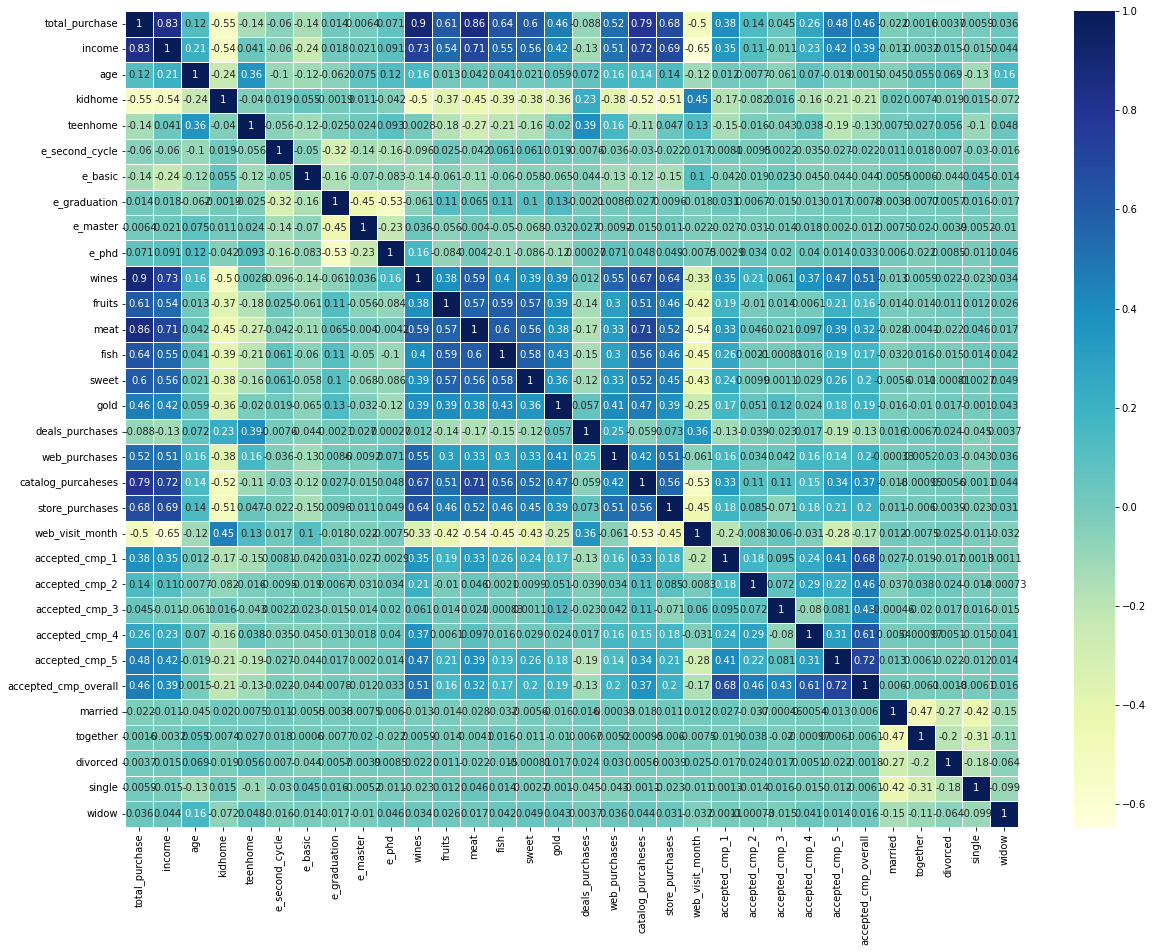

In [52]:
heat_big=data1[['total_purchase','income',"age",'kidhome','teenhome','e_second_cycle', 'e_basic','e_graduation', 'e_master', 'e_phd','wines', 'fruits','meat','fish', 'sweet', 'gold','deals_purchases', 'web_purchases','catalog_purcaheses', 'store_purchases', 'web_visit_month','accepted_cmp_1','accepted_cmp_2','accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5','accepted_cmp_overall','married','together','divorced', 'single', 'widow' ]]

plt.figure(figsize=(20,15))
sns.heatmap(heat_big.corr(),annot=True, linewidths=.5, cmap="YlGnBu")

### 3. Summary

##### 3.1 Summary statistics for numeric attribute

In [53]:
heat_big=data1[['total_purchase','income',"age",'kidhome','teenhome','e_second_cycle', 'e_basic','e_graduation', 'e_master', 'e_phd','wines', 'fruits','meat','fish', 'sweet', 'gold','deals_purchases', 'web_purchases','catalog_purcaheses', 'store_purchases', 'web_visit_month','accepted_cmp_1','accepted_cmp_2','accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5','accepted_cmp_overall','married','together','divorced', 'single', 'widow' ]]
heat_big.describe()


,total_purchase,income,age,kidhome,teenhome,e_second_cycle,e_basic,e_graduation,e_master,e_phd,...,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_overall,married,together,divorced,single,widow
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,562.764626,51737.047619,51.095692,0.442177,0.506576,0.089796,0.024490,0.504762,0.165079,0.215873,...,0.013605,0.073923,0.074376,0.073016,0.29932,0.387302,0.257596,0.104308,0.216327,0.034467
std,575.936911,20484.161878,11.705801,0.537132,0.544380,0.285954,0.154599,0.500091,0.371336,0.411520,...,0.115872,0.261705,0.262442,0.260222,0.68044,0.487244,0.437410,0.305730,0.411833,0.182467
min,4.000000,14431.500000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,35196.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,343.000000,51287.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,964.000000,68281.000000,61.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2491.000000,113734.000000,80.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000


3.2 Summary and count for categorical attribute

In [54]:
data1.describe(include=["O"])

,child_st,education_st,marital_st,marital_short,marital_child,marital_child_education
count,2205,2205,2205,2205,2205,2205
unique,2,5,5,2,4,20
top,with_child,e_graduation,married,in_relation,in_relation_with_child,in_relation_with_child_e_graduation
freq,1577,1113,854,1422,1045,523


### 4.EDA 

Campaign acceptance distribution according to the total number of customers

In [55]:
df_cmp1={"campaign_st":['accepted_cmp_1', 'accepted_cmp_2', 'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_overall'], "accepted_cmp_total":[data1[data1.accepted_cmp_1==1].accepted_cmp_1.count(),data1[data1.accepted_cmp_2==1].accepted_cmp_2.count(),data1[data1.accepted_cmp_3==1].accepted_cmp_3.count(),data1[data1.accepted_cmp_4==1].accepted_cmp_4.count(),data1[data1.accepted_cmp_5==1].accepted_cmp_5.count(), data1.accepted_cmp_overall.sum()],"table_count":[2205,2205,2205,2205,2205,2205]}
df_cmp1=pd.DataFrame(df_cmp1)
df_cmp1["perc"]= 100*df_cmp1["accepted_cmp_total"]/df_cmp1["table_count"]
df_cmp1

,campaign_st,accepted_cmp_total,table_count,perc
0,accepted_cmp_1,142,2205,6.439909
1,accepted_cmp_2,30,2205,1.360544
2,accepted_cmp_3,163,2205,7.392290
3,accepted_cmp_4,164,2205,7.437642
4,accepted_cmp_5,161,2205,7.301587
5,accepted_cmp_overall,660,2205,29.931973


this below histogram shows:

the second campaign is the less populer campaign when we compare with other 4 campaigns

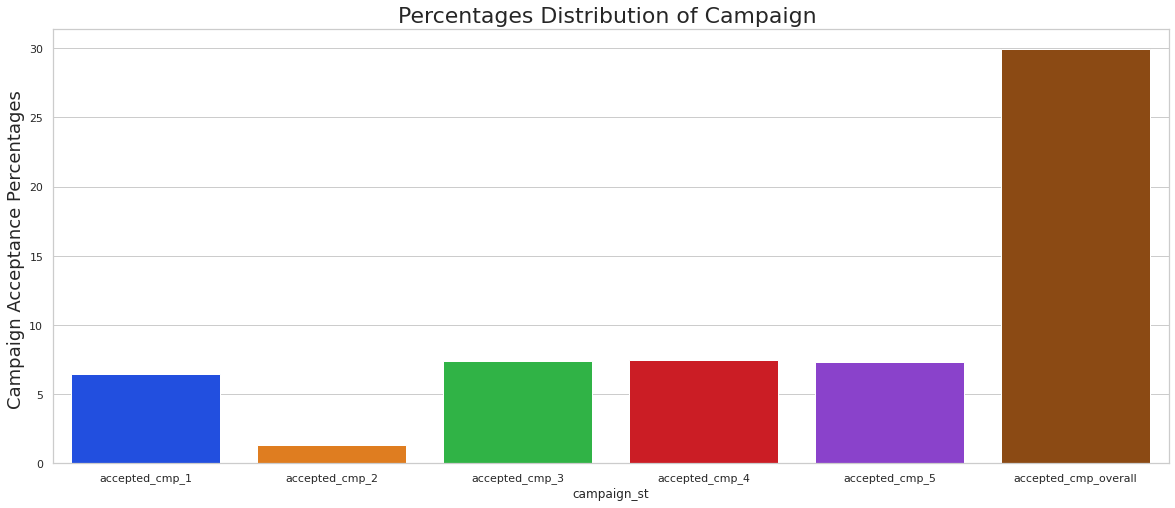

,campaign_st,accepted_cmp_total,table_count,perc
0,accepted_cmp_1,142,2205,6.439909
1,accepted_cmp_2,30,2205,1.360544
2,accepted_cmp_3,163,2205,7.392290
3,accepted_cmp_4,164,2205,7.437642
4,accepted_cmp_5,161,2205,7.301587
5,accepted_cmp_overall,660,2205,29.931973


In [56]:
sns.set(rc={"figure.figsize": (20, 8)})
sns.set_style("whitegrid")
ax = sns.barplot(df_cmp1.campaign_st, df_cmp1.perc,
 palette="bright")
ax.set_ylabel("Campaign Acceptance Percentages ", fontsize = 18)
ax.set_title("Percentages Distribution of Campaign ", fontsize = 22)
plt.show()
df_cmp1

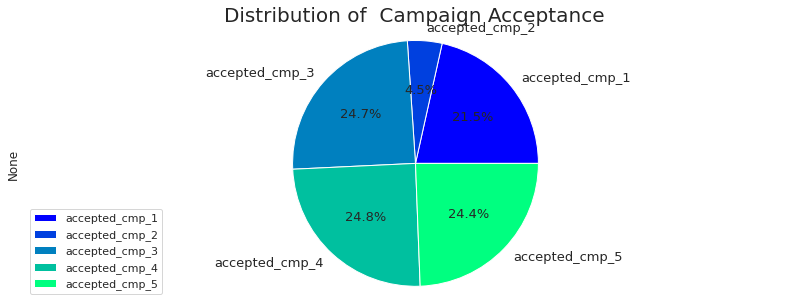

In [57]:
a=data1.pivot_table(['accepted_cmp_1','accepted_cmp_2','accepted_cmp_3','accepted_cmp_4','accepted_cmp_5'] , index='age', aggfunc="sum").sum()
a=100*a/a.sum()



plt.figure(figsize=(14,5))
a.plot(kind="pie",  fontsize=13, colormap="winter", autopct="%1.1f%%")
plt.legend(loc="lower left")
plt.title('Distribution of  Campaign Acceptance', fontsize=20)
plt.axis("equal")
plt.show()


## AGE 

age_group,"(20, 25]","(75, 80]","(25, 30]","(70, 75]","(30, 35]","(65, 70]","(55, 60]","(35, 40]","(50, 55]","(40, 45]","(60, 65]","(45, 50]"
accepted_cmp_overall,3,9,28,44,51,51,58,73,75,79,86,103


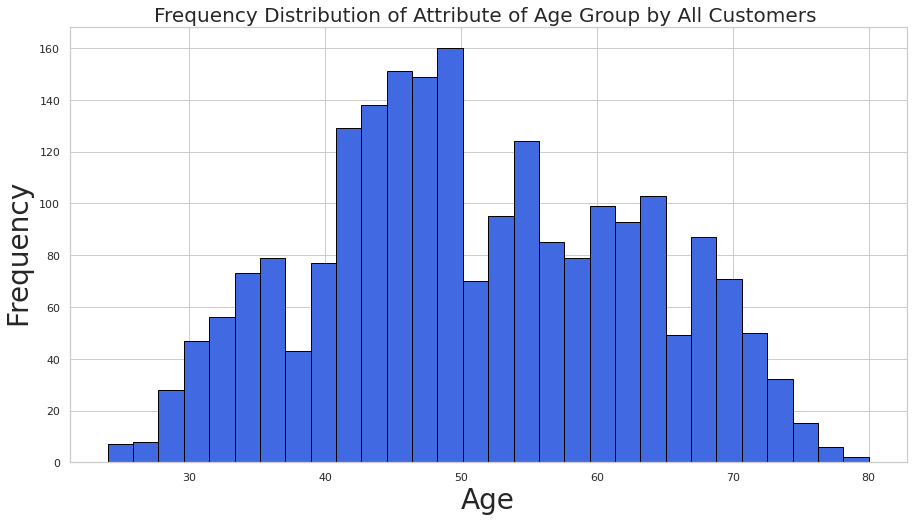

In [58]:
cmp_age = data1[np.isfinite(data1['age'])]['age']
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,8))
plt.hist(cmp_age.values,  bins=30, color="RoyalBlue",  edgecolor="black")

plt.xlabel('Age', fontsize=28)
plt.ylabel('Frequency  ', fontsize=28)
plt.title('Frequency Distribution of Attribute of Age Group by All Customers ', fontsize=20);
data1.pivot_table(["accepted_cmp_overall"], index=["age_group"], aggfunc="sum").sort_values(by="accepted_cmp_overall").T


In [59]:
cmp_age=data1.groupby('age_group')["accepted_cmp_1","accepted_cmp_2","accepted_cmp_3","accepted_cmp_4","accepted_cmp_5", ].sum()

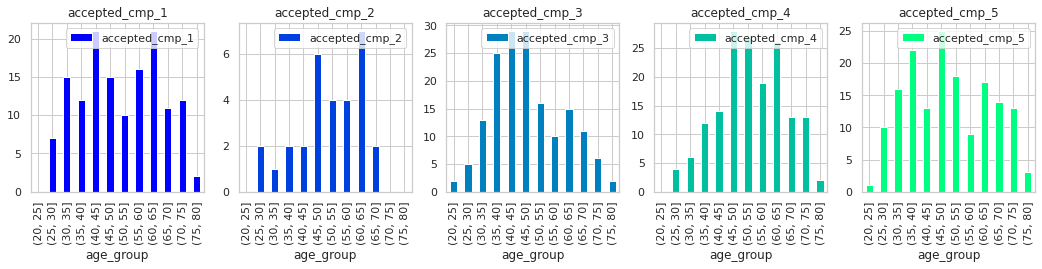

In [60]:
cmp_age.plot.bar(subplots=True,colormap="winter", layout=(5, 5), figsize=(18, 18), sharex=False);

the campaigns received most responses from  45-50 age_group  , followed by the 60-65 band and the 40-45 band.

## INCOME

income_group,"(14332.198, 24361.75]","(24361.75, 34292.0]","(34292.0, 44222.25]","(44222.25, 54152.5]","(54152.5, 64082.75]","(64082.75, 74013.0]","(74013.0, 83943.25]","(83943.25, 93873.5]","(93873.5, 103803.75]","(103803.75, 113734.0]"
income_band,1,2,3,4,5,6,7,8,9,10


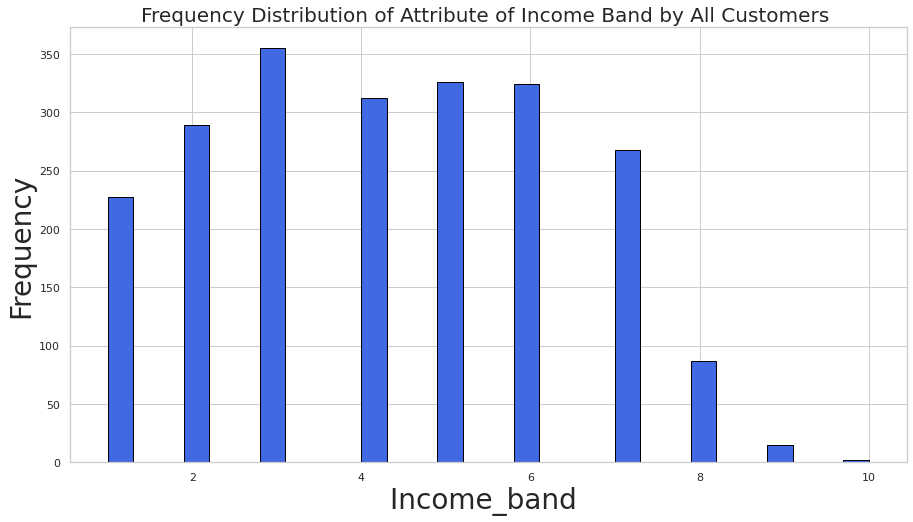

In [61]:
cmp_inc = data1[np.isfinite(data1['income_band'])]['income_band']
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,8))
plt.hist(cmp_inc.values,  bins=30, color="RoyalBlue",  edgecolor="black")

plt.xlabel('Income_band ', fontsize=28)
plt.ylabel('Frequency', fontsize=28);
plt.title('Frequency Distribution of Attribute of Income Band by All Customers ', fontsize=20);
data1.pivot_table('income_band', index='income_group').sort_values(by="income_band").T

In [62]:
cmp_income=data1.groupby('income_band')["accepted_cmp_1","accepted_cmp_2","accepted_cmp_3","accepted_cmp_4","accepted_cmp_5", ].sum()

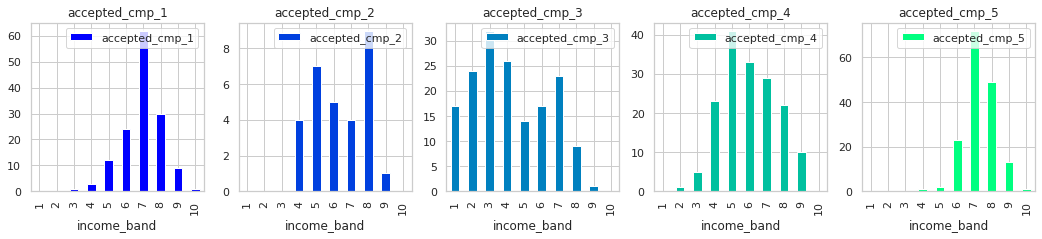

In [63]:
cmp_income.plot.bar(subplots=True,colormap="winter", layout=(5, 5), figsize=(18, 18), sharex=False);


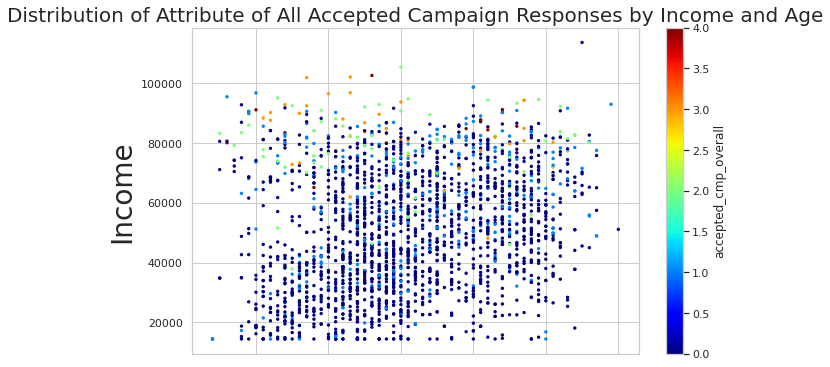

In [64]:
data1.plot.scatter(x="age", y="income", c="accepted_cmp_overall",  cmap="jet", s=5.5, figsize=(10,6))

plt.xlabel('age', fontsize=28)
plt.ylabel('Income', fontsize=28)

plt.title('Distribution of Attribute of All Accepted Campaign Responses by Income and Age', fontsize=20);

## EDUCATION 

education_st,e_basic,e_second_cycle,e_master,e_phd,e_graduation
accepted_cmp_overall,6,50,102,163,339


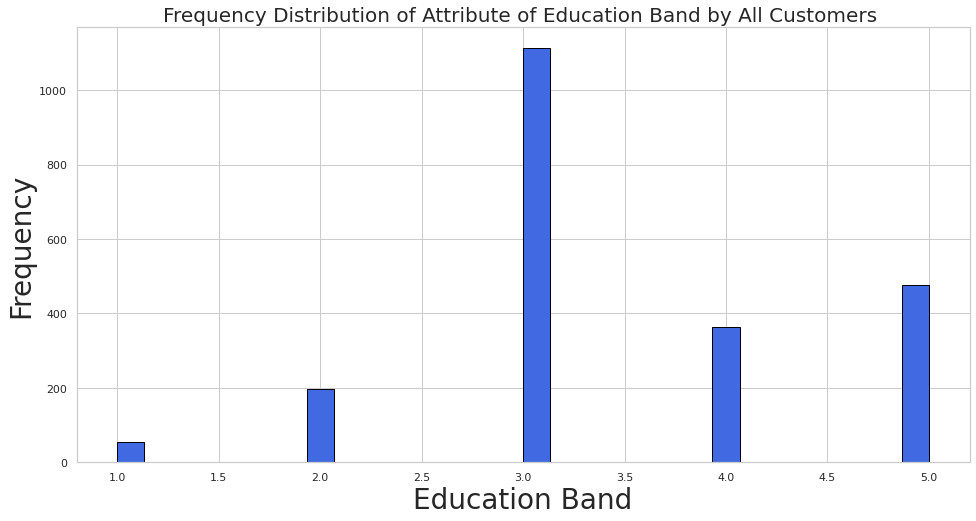

In [65]:
cmp_edu = data1[np.isfinite(data1["education_band"])]["education_band"]
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (16,8))
plt.hist(cmp_edu.values,  bins=30, color="RoyalBlue" ,  edgecolor="black" )

plt.xlabel('Education Band', fontsize=28)
plt.ylabel('Frequency', fontsize=28);
plt.title('Frequency Distribution of Attribute of Education Band by All Customers ', fontsize=20)
data1.pivot_table(['accepted_cmp_overall'], index=['education_st'], aggfunc="sum").sort_values(by="accepted_cmp_overall").T


In [66]:
data1.pivot_table('education_band', index='education_st').sort_values(by="education_band").T

education_st,e_basic,e_second_cycle,e_graduation,e_master,e_phd
education_band,1,2,3,4,5


In [67]:
cmp_edu=data1.groupby('education_st')["accepted_cmp_1","accepted_cmp_2","accepted_cmp_3","accepted_cmp_4","accepted_cmp_5", ].sum()

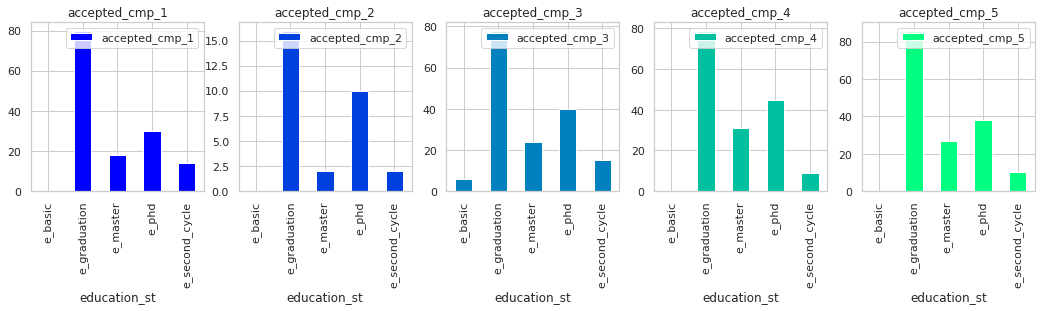

In [68]:
cmp_edu.plot.bar(subplots=True,colormap="winter", layout=(5, 5), figsize=(18, 18), sharex=False);


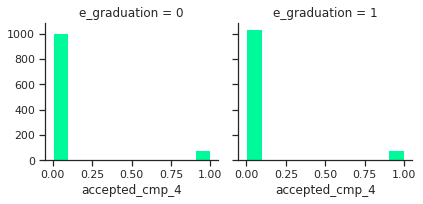

In [69]:
#looking at most accepted campaign(campaign4) by graduation status
edu= data1[["e_graduation", "accepted_cmp_4"]]

sns.set(style="ticks", color_codes=True)
e = sns.FacetGrid(edu, col="e_graduation")
e = e.map(plt.hist, "accepted_cmp_4", color="MediumSpringGreen")
plt.ticklabel_format(useOffset=False, style='plain')


In [70]:
# chi-square test
edu_crosstab = pd.crosstab(index=edu.e_graduation, columns=edu.accepted_cmp_4)
edu_table = sm.stats.Table(edu_crosstab)
edu_rslt = edu_table.test_nominal_association()
edu_rslt.pvalue

0.5393616138804489



 chi-square test shows graduation status has some statistically significant for campaign4.

## MARITAL STATUS

marital_st,married,together,widow,single,divorced
marital_band,1,2,3,4,5


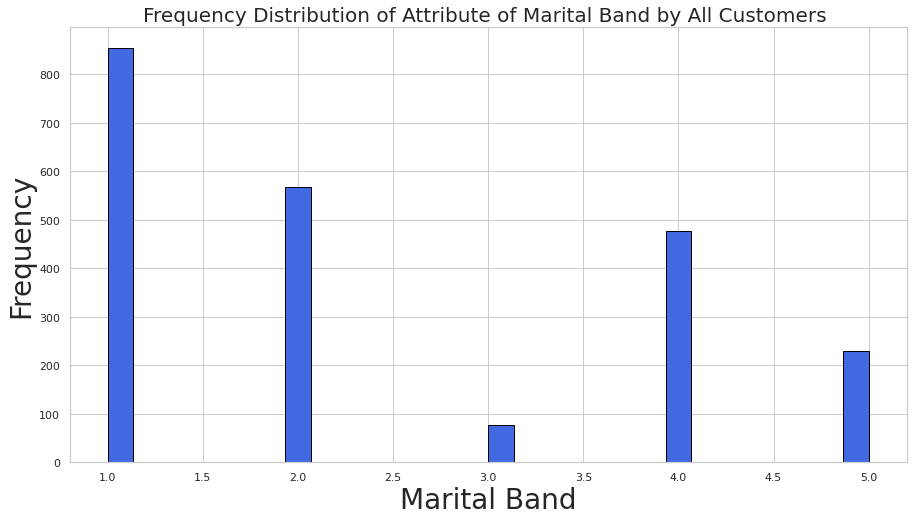

In [71]:
cmp_mar = data1[np.isfinite(data1["marital_band"])]["marital_band"]
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,8))
plt.hist(cmp_mar.values,  bins=30, color="RoyalBlue",  edgecolor="black")

plt.xlabel('Marital Band', fontsize=28)
plt.ylabel('Frequency', fontsize=28);
plt.title('Frequency Distribution of Attribute of Marital Band by All Customers ', fontsize=20)
data1.pivot_table('marital_band', index='marital_st').sort_values(by="marital_band").T

In [72]:
data1.pivot_table(["accepted_cmp_overall"], index=["marital_band"], aggfunc="sum").sort_values(by="accepted_cmp_overall").T

marital_band,3,5,4,2,1
accepted_cmp_overall,27,68,139,166,260


In [73]:
cmp_marital=data1.groupby('marital_st')["accepted_cmp_1","accepted_cmp_2","accepted_cmp_3","accepted_cmp_4","accepted_cmp_5", ].sum()

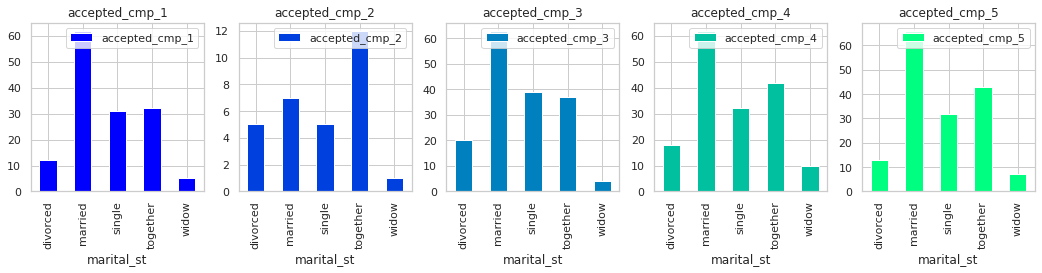

In [74]:
cmp_marital.plot.bar(subplots=True,colormap="winter", layout=(5, 5), figsize=(18, 18), sharex=False);



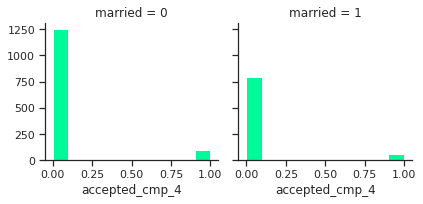

In [75]:
#looking at most accepted campaign(campaign4) by married status
mari= data1[["married", "accepted_cmp_4"]]

sns.set(style="ticks", color_codes=True)
c = sns.FacetGrid(mari, col="married")
c = c.map(plt.hist, "accepted_cmp_4", color="MediumSpringGreen")
plt.ticklabel_format(useOffset=False, style='plain')


In [76]:
# chi-square test
mari_crosstab = pd.crosstab(index=mari.married, columns=mari.accepted_cmp_4)
mari_table = sm.stats.Table(mari_crosstab)
mari_rslt = mari_table.test_nominal_association()
mari_rslt.pvalue

0.8003988675229015



chi-square test shows married status has some statistically significant for campaign4.

# CHILD

child_total,3,2,1,0
accepted_cmp_overall,6,55,221,378


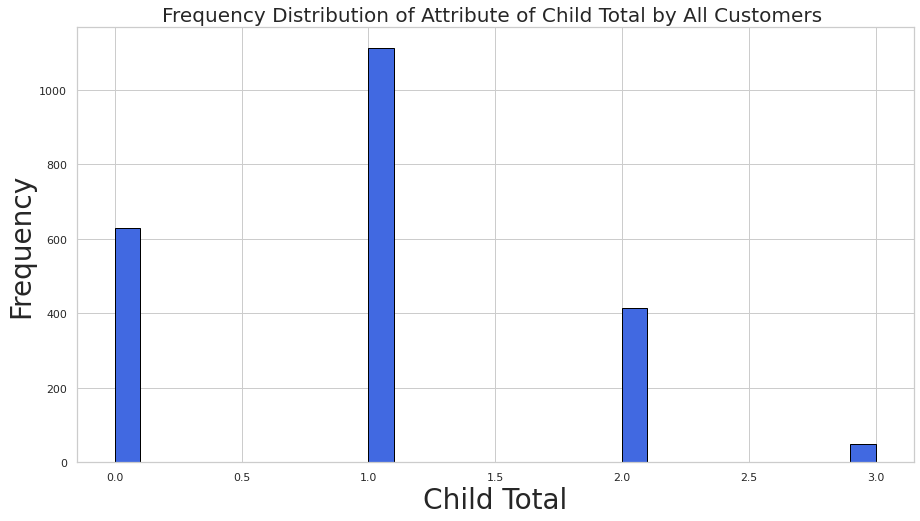

In [77]:
cmp_chi = data1[np.isfinite(data1["child_total"])]["child_total"]
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,8))
plt.hist(cmp_chi.values,  bins=30, color="RoyalBlue",  edgecolor="black")

plt.xlabel('Child Total', fontsize=28)
plt.ylabel('Frequency', fontsize=28);
plt.title('Frequency Distribution of Attribute of Child Total by All Customers ', fontsize=20)
data1.pivot_table(["accepted_cmp_overall"], index=["child_total"], aggfunc="sum").sort_values(by="accepted_cmp_overall").T

In [78]:
cmp_child=data1.groupby('child_total')["accepted_cmp_1","accepted_cmp_2","accepted_cmp_3","accepted_cmp_4","accepted_cmp_5", ].sum()

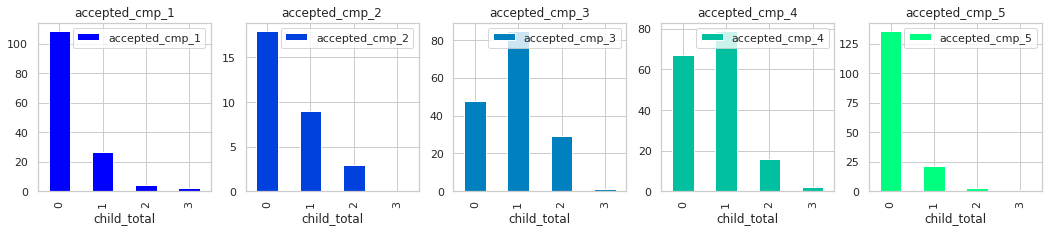

In [79]:
cmp_child.plot.bar(subplots=True,colormap="winter", layout=(5, 5), figsize=(18, 18), sharex=False);

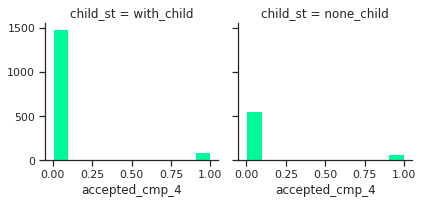

In [80]:
#looking at most accepted campaign(campaign4) by child status
child= data1[["child_st", "accepted_cmp_4"]]

sns.set(style="ticks", color_codes=True)
c = sns.FacetGrid(child, col="child_st")
c = c.map(plt.hist, "accepted_cmp_4", color="MediumSpringGreen")
plt.ticklabel_format(useOffset=False, style='plain')


In [81]:
# chi-square test
child_crosstab = pd.crosstab(index=child.child_st, columns=child.accepted_cmp_4)
child_table = sm.stats.Table(child_crosstab)
child_rslt = child_table.test_nominal_association()
child_rslt.pvalue

0.00026312161113506427

Looks like the difference in child status weren't statistically significant

# Unified Marital Child Education Status

marital_child_education,in_relation_none_child_e_second_cycle,in_relation_with_child_e_second_cycle,nonrelation_none_child_e_second_cycle,nonrelation_with_child_e_second_cycle,in_relation_none_child_e_graduation,in_relation_with_child_e_graduation,nonrelation_none_child_e_graduation,nonrelation_with_child_e_graduation,in_relation_with_child_e_master,in_relation_none_child_e_master,nonrelation_with_child_e_master,nonrelation_none_child_e_master,in_relation_none_child_e_phd,in_relation_with_child_e_phd,nonrelation_none_child_e_phd,nonrelation_with_child_e_phd,in_relation_none_child_e_basic,in_relation_with_child_e_basic,nonrelation_with_child_e_basic,nonrelation_none_child_e_basic
marital_child_edu_band,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


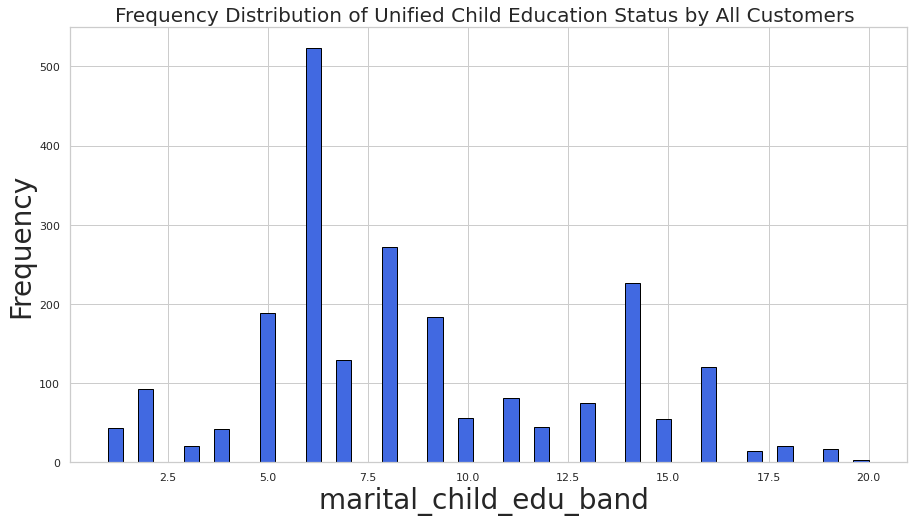

In [82]:
cmp_mce = data1[np.isfinite(data1['marital_child_edu_band'])]['marital_child_edu_band']
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig = plt.figure(figsize = (15,8))
plt.hist(cmp_mce.values,  bins=50, color="RoyalBlue",  edgecolor="black")

plt.xlabel('marital_child_edu_band ', fontsize=28)
plt.ylabel('Frequency', fontsize=28);
plt.title('Frequency Distribution of Unified Child Education Status by All Customers ', fontsize=20)
data1.pivot_table('marital_child_edu_band', index='marital_child_education').sort_values(by="marital_child_edu_band").T


In [83]:
data1.pivot_table(["accepted_cmp_1","accepted_cmp_2","accepted_cmp_3","accepted_cmp_4","accepted_cmp_5"], index=["marital_child_edu_band"], aggfunc="sum").sort_values(by="marital_child_edu_band").T

marital_child_edu_band,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
accepted_cmp_1,8,1,4,1,41,15,20,4,3,8,1,6,11,7,11,1,0,0,0,0
accepted_cmp_2,0,0,2,0,7,4,4,1,1,0,0,1,2,5,2,1,0,0,0,0
accepted_cmp_3,5,6,2,2,12,28,11,27,15,4,2,3,5,19,5,11,1,5,0,0
accepted_cmp_4,1,3,4,1,16,35,14,14,14,4,5,8,14,17,6,8,0,0,0,0
accepted_cmp_5,6,0,3,1,48,12,23,3,4,13,1,9,24,2,10,2,0,0,0,0


In [84]:
cmp_combined=data1.groupby('marital_child_edu_band')["accepted_cmp_1","accepted_cmp_2","accepted_cmp_3","accepted_cmp_4","accepted_cmp_5", ].sum()

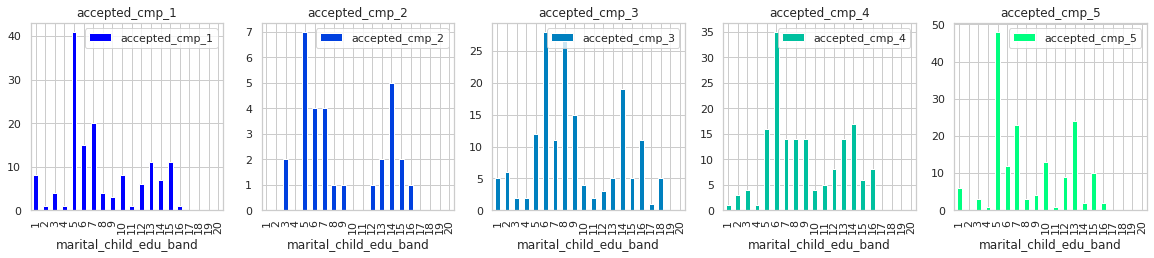

In [85]:
cmp_combined.plot.bar(subplots=True,colormap="winter", layout=(5, 5), figsize=(20, 20), sharex=False);

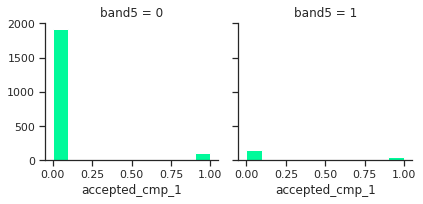

In [86]:
#looking at  campaign1 combined band_5 status
mce1= data1[["band5", "accepted_cmp_1"]]

sns.set(style="ticks", color_codes=True)
mce2 = sns.FacetGrid(mce1, col="band5")
mce2 = mce2.map(plt.hist, "accepted_cmp_1", color="MediumSpringGreen")
plt.ticklabel_format(useOffset=False, style='plain')


In [87]:
# chi-square test
mce_crosstab= pd.crosstab(index=mce1.band5, columns=mce1.accepted_cmp_1)
mce_table = sm.stats.Table(mce_crosstab)
mce_rslt = mce_table.test_nominal_association()
mce_rslt.pvalue

0.0

it looks like marital_child_edu_band_5 status weren't statistically significant for campaign1.

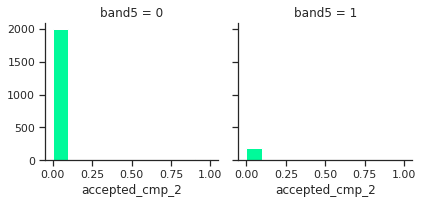

In [88]:
#looking at  campaign2 by marital_child_edu_band_5 status
mce1= data1[["band5", "accepted_cmp_2"]]

sns.set(style="ticks", color_codes=True)
mce2 = sns.FacetGrid(mce1, col="band5")
mce2 = mce2.map(plt.hist, "accepted_cmp_2", color="MediumSpringGreen")
plt.ticklabel_format(useOffset=False, style='plain')


In [89]:
# chi-square test
mce_crosstab = pd.crosstab(index=mce1.band5, columns=mce1.accepted_cmp_2)
mce_table = sm.stats.Table(mce_crosstab)
mce_rslt = mce_table.test_nominal_association()
mce_rslt.pvalue

0.0036362593209713356

Looks like the difference in marital_child_edu_band_5 status weren't statistically significantfor campaign2

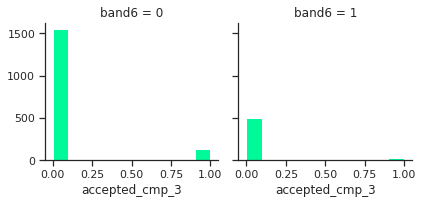

In [90]:
#looking at  campaign3 by marital_child_edu_band_6 status
mce1= data1[["band6", "accepted_cmp_3"]]

sns.set(style="ticks", color_codes=True)
mce2 = sns.FacetGrid(mce1, col="band6")
mce2 = mce2.map(plt.hist, "accepted_cmp_3", color="MediumSpringGreen")
plt.ticklabel_format(useOffset=False, style='plain')


In [91]:
# chi-square test
mce_crosstab = pd.crosstab(index=mce1.band6, columns=mce1.accepted_cmp_3)
mce_table = sm.stats.Table(mce_crosstab)
mce_rslt = mce_table.test_nominal_association()
mce_rslt.pvalue

0.041339671717506854

Looks like the difference in marital_child_edu_band_6 status weren't statistically significantfor campaign3


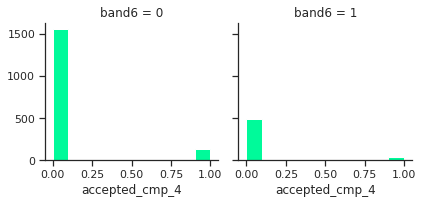

In [92]:
#looking at  campaign4 by marital_child_edu_band_6 status
mce1= data1[["band6", "accepted_cmp_4"]]

sns.set(style="ticks", color_codes=True)
mce2 = sns.FacetGrid(mce1, col="band6")
mce2 = mce2.map(plt.hist, "accepted_cmp_4", color="MediumSpringGreen")
plt.ticklabel_format(useOffset=False, style='plain')


In [93]:
# chi-square test
mce_crosstab = pd.crosstab(index=mce1.band6, columns=mce1.accepted_cmp_4)
mce_table = sm.stats.Table(mce_crosstab)
mce_rslt = mce_table.test_nominal_association()
mce_rslt.pvalue

0.4569065080959728

Looks like the difference in marital_child_edu_band_6 status weren't statistically significantfor campaign4

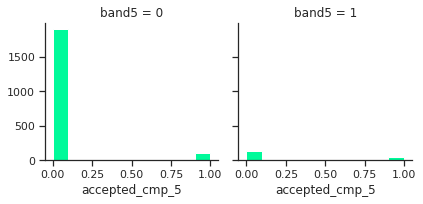

In [94]:
#looking at  campaign5 by marital_child_edu_band_5 status
mce1= data1[["band5", "accepted_cmp_5"]]

sns.set(style="ticks", color_codes=True)
mce2 = sns.FacetGrid(mce1, col="band5")
mce2 = mce2.map(plt.hist, "accepted_cmp_5", color="MediumSpringGreen")
plt.ticklabel_format(useOffset=False, style='plain')


In [95]:
# chi-square test
mce_crosstab = pd.crosstab(index=mce1.band5, columns=mce1.accepted_cmp_5)
mce_table = sm.stats.Table(mce_crosstab)
mce_rslt = mce_table.test_nominal_association()
mce_rslt.pvalue

0.0

it looks like marital_child_edu_band_5 status weren't statistically significant for campaign5

In [96]:
data_heatmap= data1[["band1","band2","band3","band4","band5","band6","band7","band8","band9","band10","band11","band12","band13","band14","band15","band16","band17","band18","band19","band20","age","income","accepted_cmp_1","accepted_cmp_2","accepted_cmp_3","accepted_cmp_4","accepted_cmp_5"]]

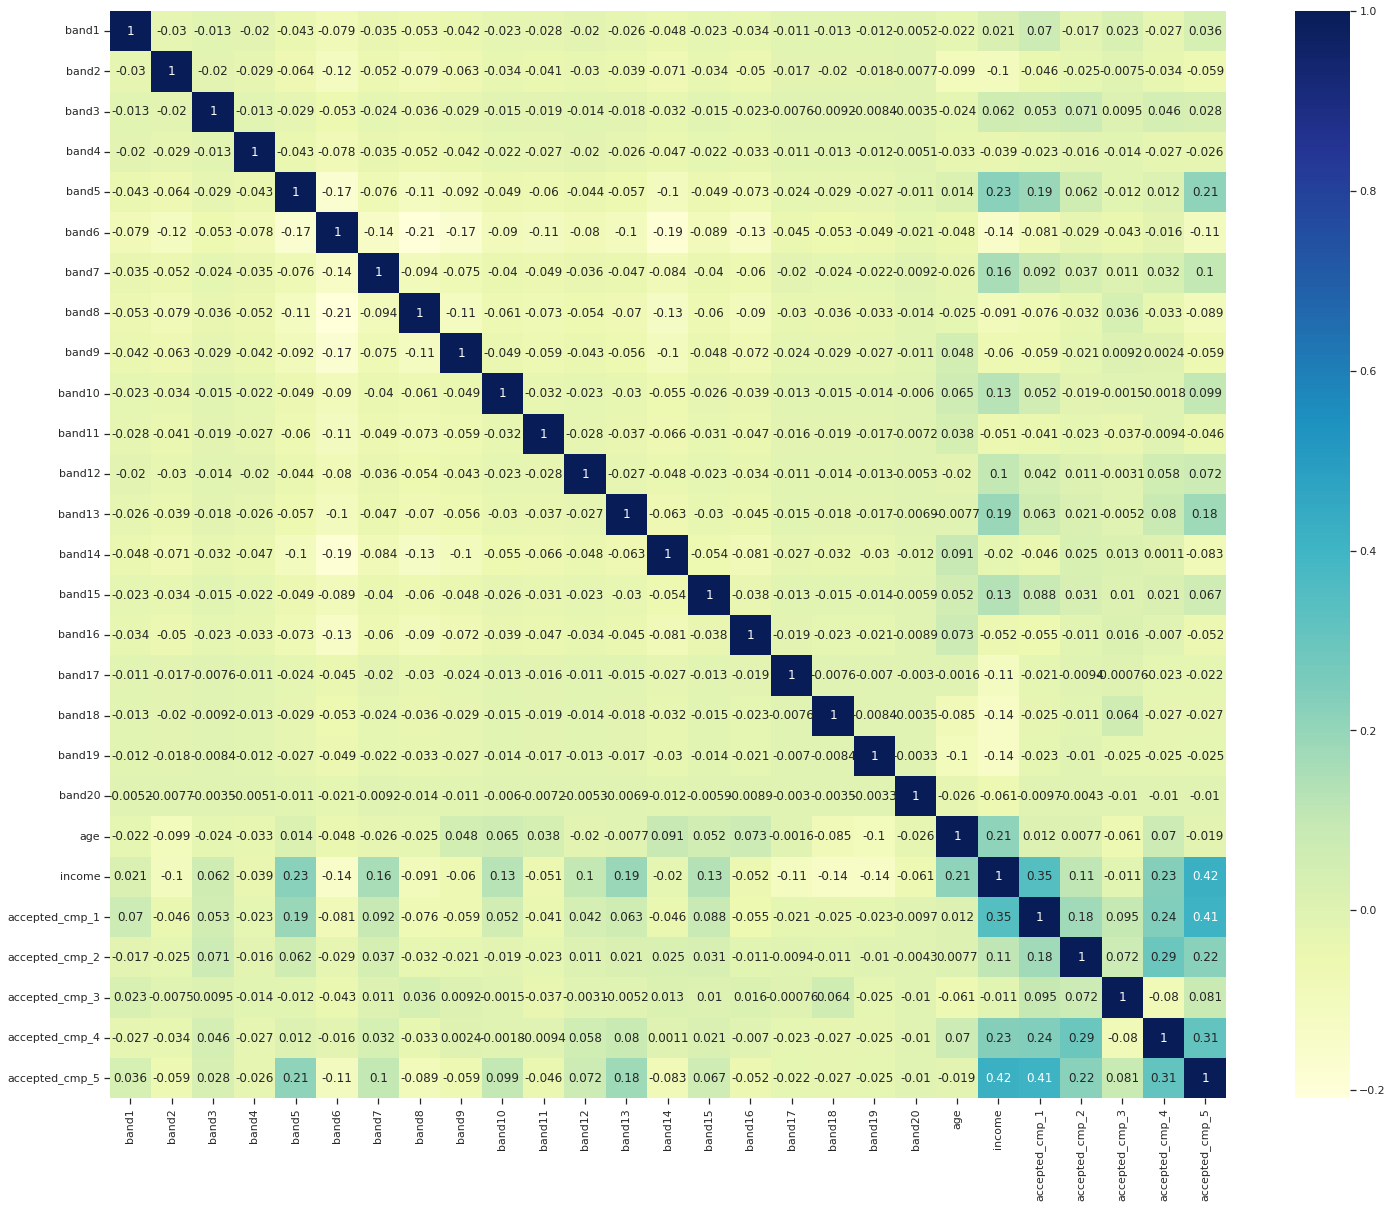

In [97]:
plt.figure(figsize=(25,20))
sns.heatmap(data_heatmap.corr(),annot=True,  cmap="YlGnBu" );



## 5 Statistical Modelling - Logistic Regression, XGBOOST, Random Forest, 

### CAMPAIGN 1 through unified band5

In [98]:
X=data1[["band5"]]
y=data1['accepted_cmp_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### LOGISTIC REGRESSION

In [99]:
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.935374149659864
Validation Accuracy: 0.9365079365079365


#### XGBOOST

In [100]:

model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.935374149659864
Validation Accuracy: 0.9365079365079365


#### RANDOM FOREST

In [101]:

model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.935374149659864
Validation Accuracy: 0.9365079365079365


### CAMPAIGN 2 through unified band5

In [102]:
X=data1[["band5"]]
y=data1['accepted_cmp_2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### LOGISTIC REGRESSION

In [103]:
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.9863945578231292
Validation Accuracy: 0.9863945578231292


#### XGBOOST

In [104]:

model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.9863945578231292
Validation Accuracy: 0.9863945578231292


#### RANDOM FOREST

In [105]:

model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.9863945578231292
Validation Accuracy: 0.9863945578231292


### CAMPAIGN 3 through unified band5

In [106]:
X=data1[["band5"]]
y=data1['accepted_cmp_3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### LOGISTIC REGRESSION

In [107]:
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.9263038548752834
Validation Accuracy: 0.9251700680272109


#### XGBOOST

In [108]:

model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.9263038548752834
Validation Accuracy: 0.9251700680272109


#### RANDOM FOREST

In [109]:

model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.9263038548752834
Validation Accuracy: 0.9251700680272109


### CAMPAIGN 4 through unified band5

In [110]:
X=data1[["band5"]]
y=data1['accepted_cmp_4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### LOGISTIC REGRESSION

In [111]:
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.9257369614512472
Validation Accuracy: 0.9251700680272109


#### XGBOOST

In [112]:

model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.9257369614512472
Validation Accuracy: 0.9251700680272109


#### RANDOM FOREST

In [113]:

model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.9257369614512472
Validation Accuracy: 0.9251700680272109


### CAMPAIGN 5 through unified band5

In [114]:
X=data1[["band5"]]
y=data1['accepted_cmp_5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### LOGISTIC REGRESSION

In [115]:
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.9268707482993197
Validation Accuracy: 0.927437641723356


#### XGBOOST

In [116]:

model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.9268707482993197
Validation Accuracy: 0.927437641723356


#### RANDOM FOREST

In [117]:

model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.9268707482993197
Validation Accuracy: 0.927437641723356


### Conclusion of EDA

There is no strong correlation among the numeric attributes.

There is neither strong positive nor strong negative correlation present in any variable.

The strongest correlation is present between total purchase, income and campaign acceptance on heatmaps.

#### campaigns reached 660 out of 2205 in total.

the distribution shows below

campaign1 performance 6.43%

campaign2 render 1.36%

campaign3 performance 7.39%

campaign4 performance 7.43%

campaign5 performance 7.30%

total campaign acceptance was 29.93%.


#### The distribution of the campaigns in the total campaign acceptance is:

campaign1 performance 21.51%

campaign2 implementation 4.54

campaign3 performance 24.69%

campaign4 rendering 24.84%

campaign5 performance 24.39%

